# Setup

In [1]:
# data wrangling
import pandas as pd

# top2vec
from top2vec import Top2Vec

# data visualisation
import matplotlib.pyplot as plt

# set seed
import random
random.seed(0)

In [2]:
# import data
df = pd.read_excel("output/obama_speeches.xlsx", index_col = 0)
df

,speech,date
file_1,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2004-07-27
file_2,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2005-01-06
file_3,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2005-06-04
file_4,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2005-10-25
file_5,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2005-12-15
...,...,...
file_432,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2017-01-10
file_433,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2017-01-12
file_434,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2017-01-17
file_435,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2017-01-18


In [3]:
speeches_list = df['speech'].tolist()

# Top2Vec

In [4]:
# train top2vec model
model = Top2Vec(speeches_list)

2022-05-30 17:08:11,211 - top2vec - INFO - Pre-processing documents for training
2022-05-30 17:08:14,178 - top2vec - INFO - Creating joint document/word embedding
2022-05-30 17:09:22,895 - top2vec - INFO - Creating lower dimension embedding of documents
2022-05-30 17:09:29,109 - top2vec - INFO - Finding dense areas of documents
2022-05-30 17:09:29,120 - top2vec - INFO - Finding topics


In [5]:
# print the number of speeches most similar to each topic
topic_sizes = model.get_topic_sizes()
print(topic_sizes)

(array([154, 130, 111,  41]), array([0, 1, 2, 3]))


In [6]:
# get topic parameters
topic_words, word_scores, topic_nums = model.get_topics()

In [7]:
# assign names to topics
topic_names = ['enemies', 'finance', 'injustice', 'defence']

In [8]:
# print topics and associated keywords
for words, scores, topic in zip(topic_words, word_scores, topic_names):
    print(f"topic: {topic}")
    print(f"keywords: {words}\n")

topic: enemies
keywords: ['nations' 'human' 'world' 'terrorist' 'international' 'countries'
 'governments' 'united' 'must' 'terrorists' 'isil' 'partners' 'societies'
 'conflict' 'peoples' 'region' 'peace' 'dignity' 'peaceful' 'europe'
 'beings' 'extremism' 'terrorism' 'progress' 'diplomacy' 'extremists'
 'global' 'civilians' 'against' 'democracy' 'pursue' 'security' 'africa'
 'citizens' 'syria' 'conflicts' 'partner' 'people' 'peacefully' 'states'
 'democracies' 'freedom' 'engagement' 'development' 'regime' 'destroy'
 'cooperation' 'arab' 'nuclear' 'attacks']

topic: finance
keywords: ['economy' 'college' 'money' 'jobs' 'afford' 'deficit' 'tax' 'care'
 'spending' 'affordable' 'republicans' 'cuts' 'get' 'insurance' 'savings'
 'health' 'medicare' 'budget' 'debt' 'costs' 'cost' 'reform' 'pay'
 'democrats' 'plan' 'congress' 'premiums' 'loans' 'class' 'job' 'deficits'
 'seniors' 'folks' 'recession' 'recovery' 'businesses' 'banks' 'financial'
 'medicaid' 'companies' 'investments' 'trillion' '

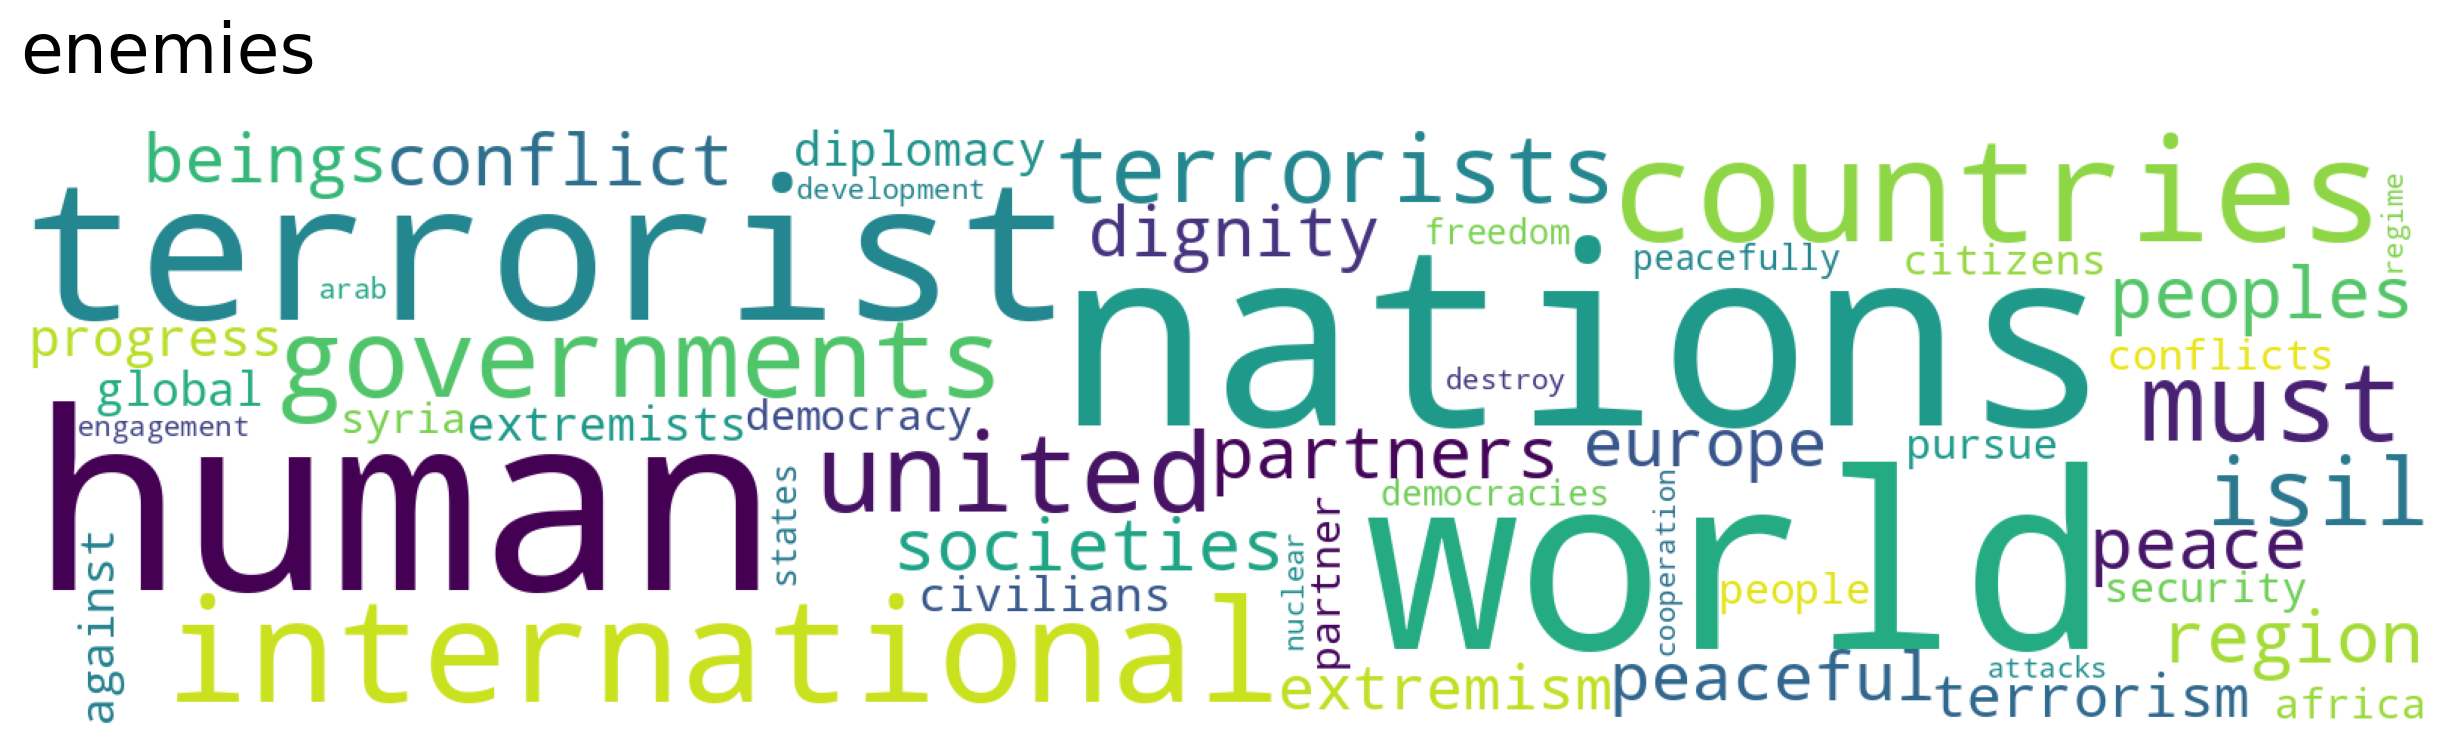

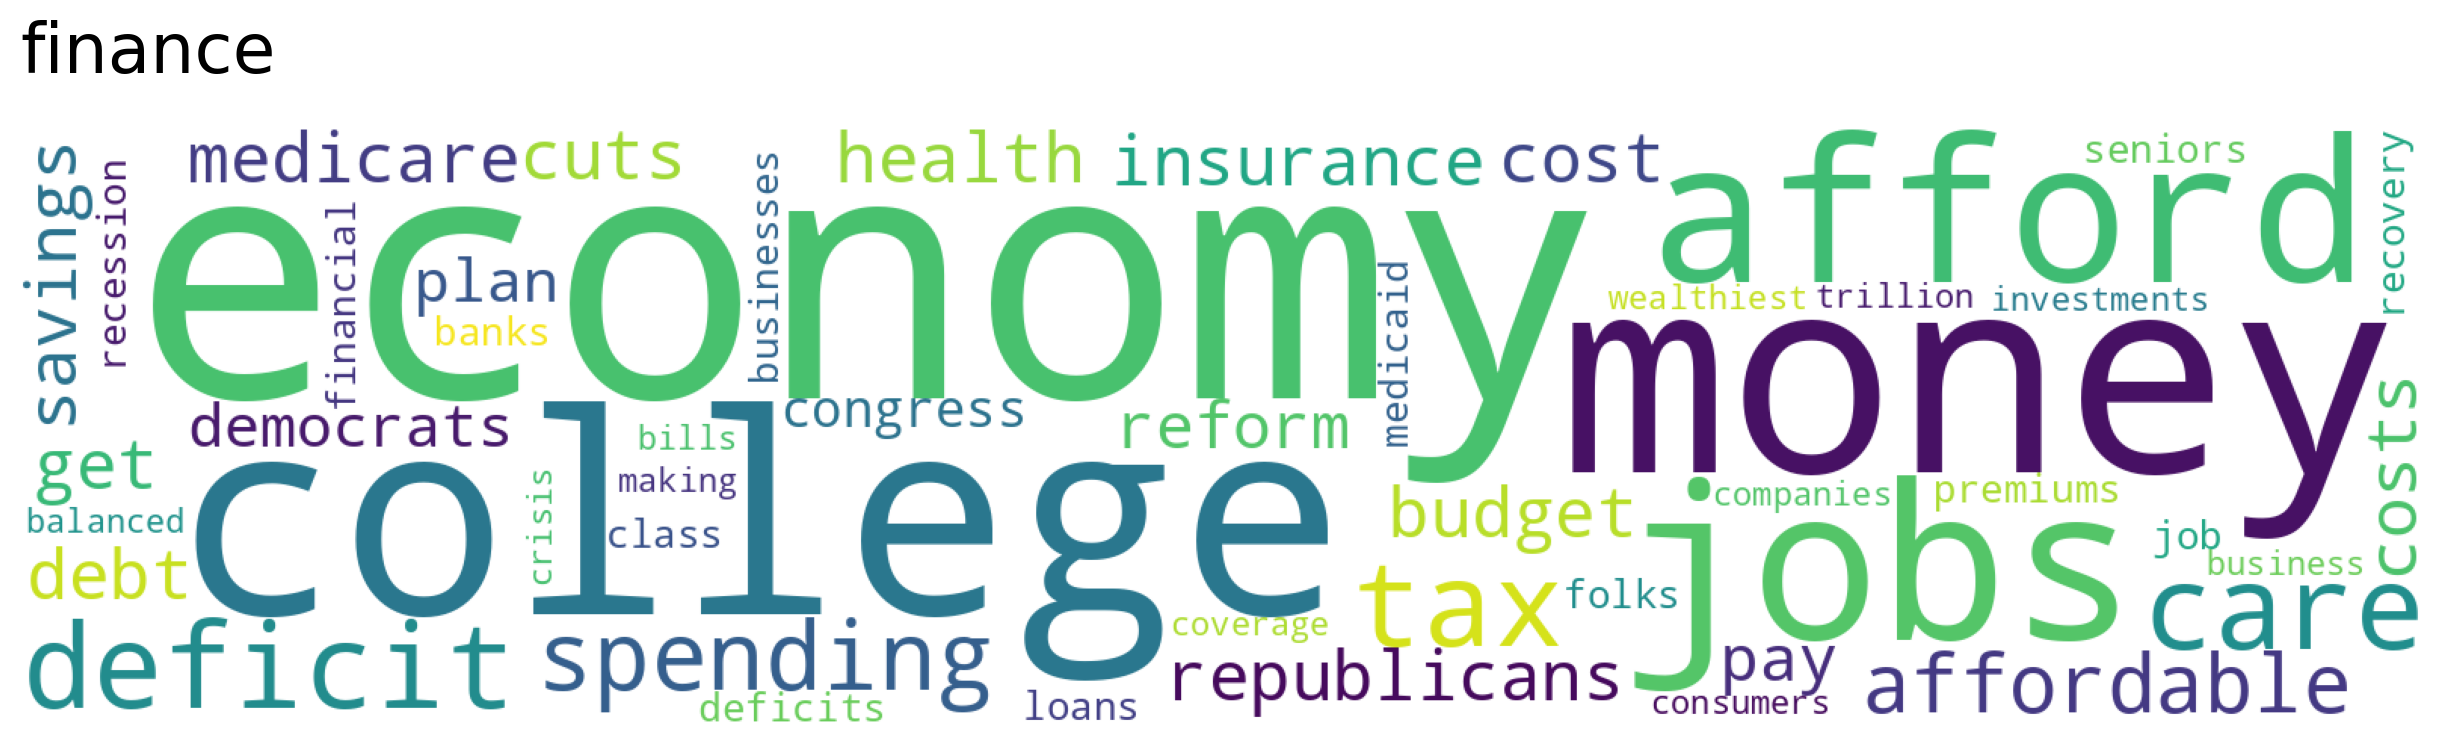

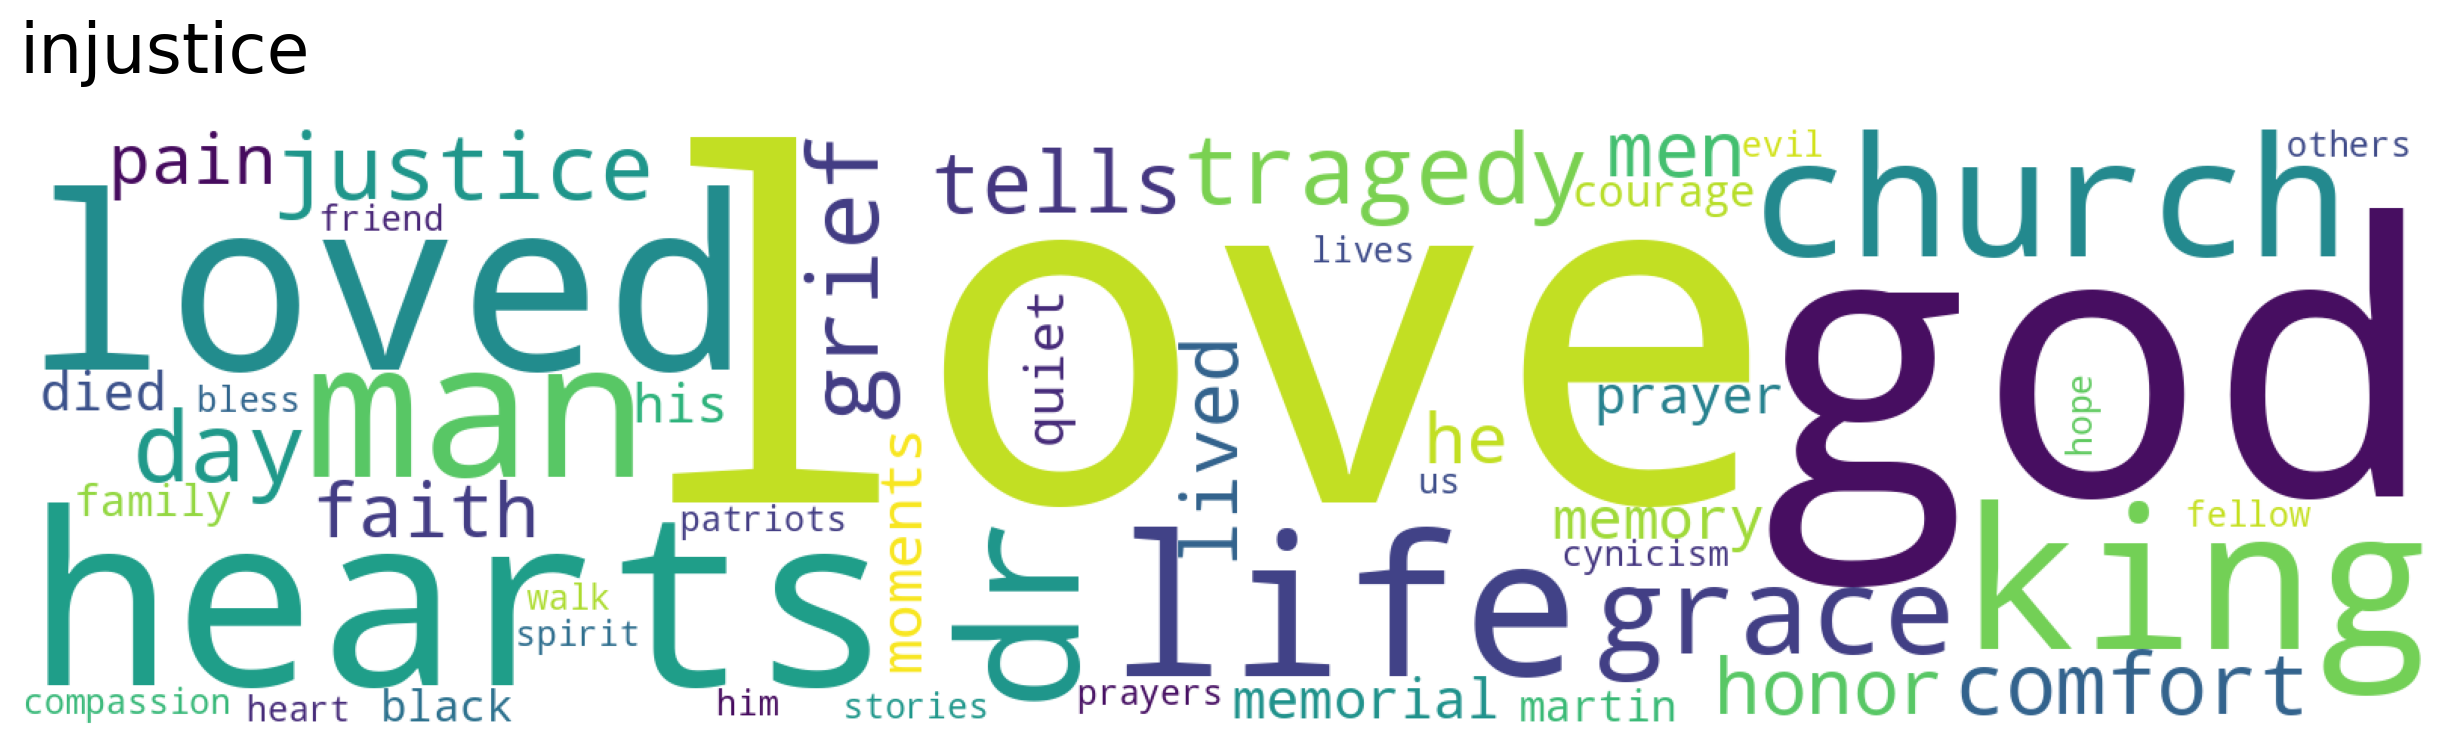

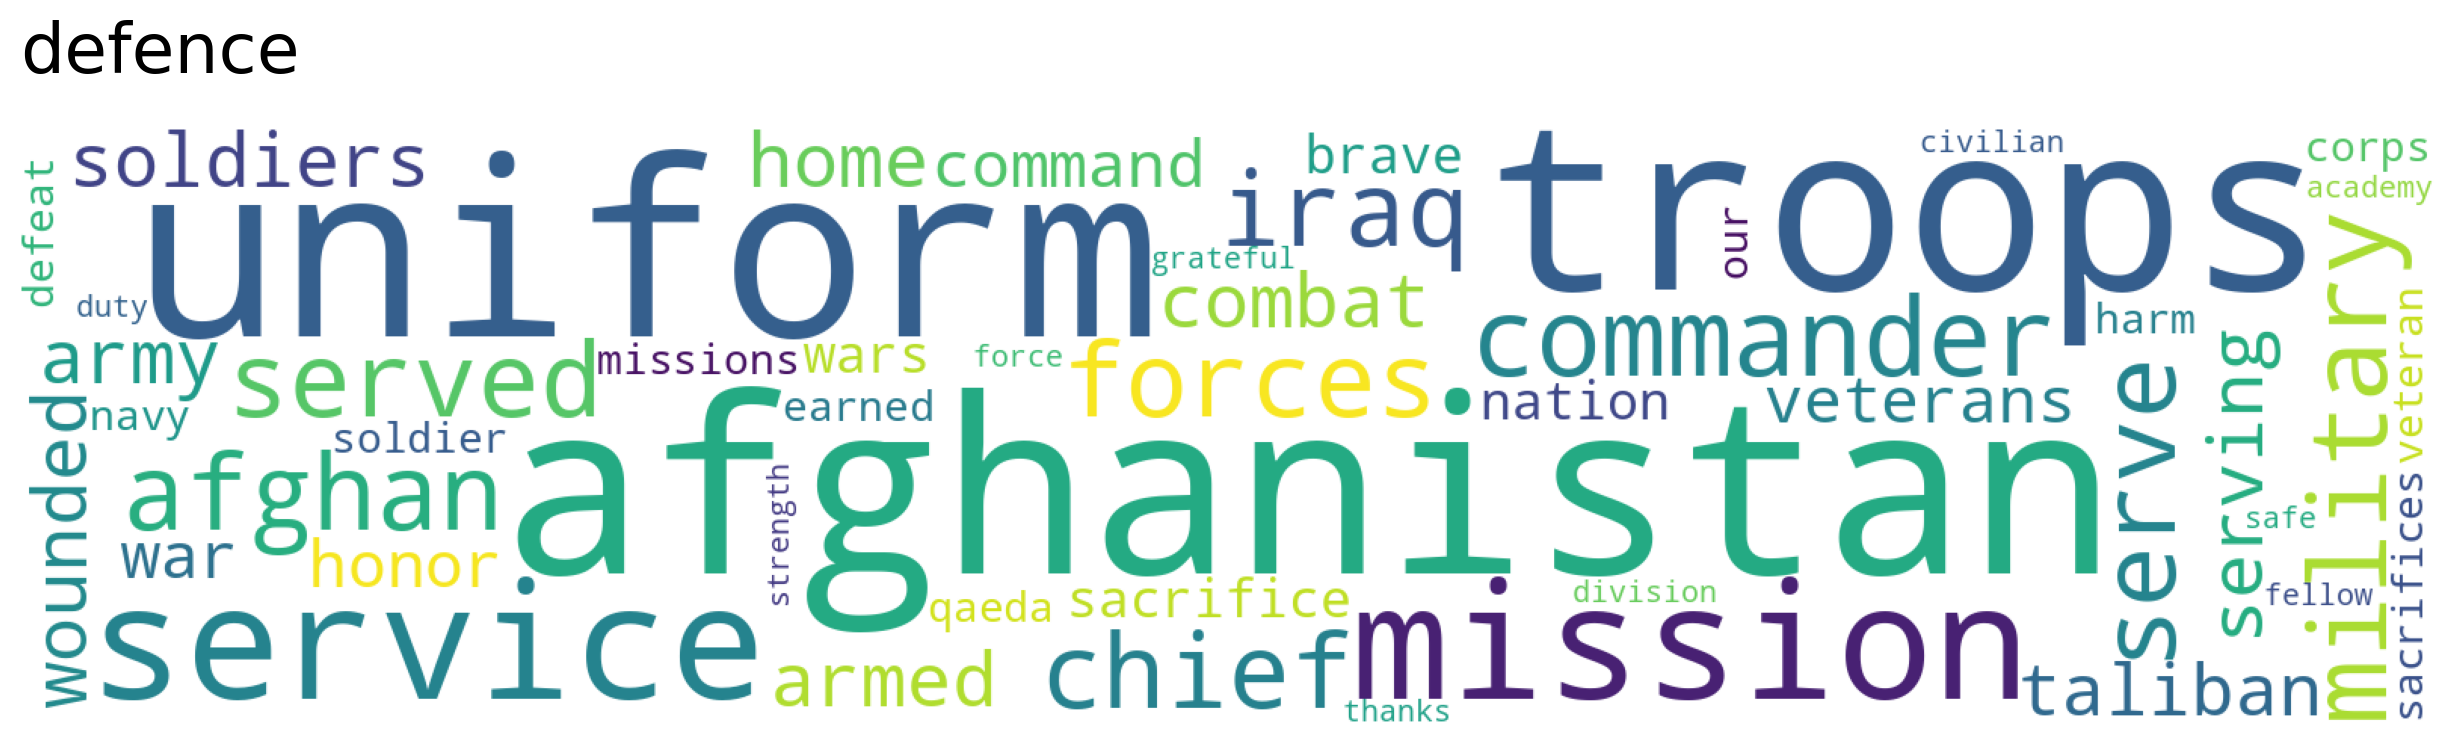

In [9]:
# generate word clouds
i = 0
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color = "white")
    plt.title(topic_names[i], loc = "left", fontsize = 25, pad = 20)
    plt.show()
    print("\n")
    i = i + 1